### Homework 4: Handwritten digits classification using fully connected neural networks

Build and train NN model to achieve the lowest error rate on the MNIST test set

    - Build a fully connected neural network (fcnn) with at least one hidden layer
    - Train the fcnn using (x_train_flat, y_train) and test the nn using (x_test_flat, y_test)
    - Calculate and print out the error rate of the trained model on the test set
    - You are free to all strategies you learned to improve the model performance

Grading:

- 100 pts: test_err <= 3%
- 95 pts:  test_err in (3%, 4%]
- 90 pts:  test_err in (4%, 5%]
- 85 pts:  test_err in (5%, 6%]
- 80 pts:  test_err in (6%, 8%]
- 75 pts:  test_err in (8%, 10%]
- 70 pts:  test_err in (10%, 12%]
- 65 pts:  test_err in (12%, 15%]
- 60 pts:  test_err in (15%, 20%]
- <60 pts: test_err > 20%

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import keras # please install the Keras package first
from sklearn.model_selection import train_test_split
keras.__version__ # tested using keras 2.13.1

'3.5.0'

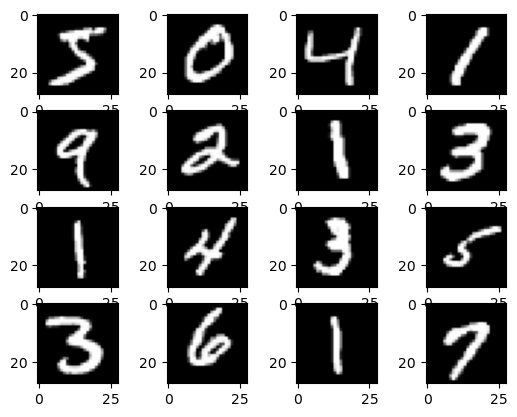

first 5 target values(training set): [5 0 4 1 9]
the corresponding onehot vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [2]:
## load the MNIST digits dataset from keras.datasets 
def load_digits(show_sample = True):
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    
    #show first 16 images
    if show_sample == True:
        nImg = 4
        for i in range(nImg*nImg):
            plt.subplot(nImg, nImg, i+1)
            plt.imshow(x_train[i], cmap = 'Greys_r')
        plt.show()
        
    x_train_1 = np.reshape(x_train, [x_train.shape[0], x_train.shape[1] * x_train.shape[2]])
    x_test_1 = np.reshape(x_test, [x_test.shape[0], x_test.shape[1] * x_test.shape[2]])
    
    return x_train_1, y_train, x_test_1, y_test

x_train_flat, y_train, x_test_flat, y_test = load_digits()

# to one-hot vectors
y_train_onehot = keras.utils.to_categorical(y_train)
print('first 5 target values(training set):', y_train[:5])
print('the corresponding onehot vectors:\n', y_train_onehot[:5])

#### Create your NN using Keras

    - Build a fully connected neural network (fcnn) with at least one hidden layer
    - Train the fcnn using (x_train_flat, y_train) and test the nn using (x_test_flat, y_test)
    - Calculate and print out the error rate of the trainined model on the test set
    - Print out the confusion matrix for the model on the test set


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7493 - loss: 5.2036 - val_accuracy: 0.8878 - val_loss: 0.4031
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8973 - loss: 0.3870 - val_accuracy: 0.9228 - val_loss: 0.2870
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9365 - loss: 0.2281 - val_accuracy: 0.9472 - val_loss: 0.1979
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9510 - loss: 0.1744 - val_accuracy: 0.9542 - val_loss: 0.1720
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9580 - loss: 0.1505 - val_accuracy: 0.9592 - val_loss: 0.1701
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9617 - loss: 0.1317 - val_accuracy: 0.9541 - val_loss: 0.1772
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9698 - loss: 0.1087 - val_accuracy: 0.9646 - val_loss: 0.1508
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9702 - loss: 0.1084 - 

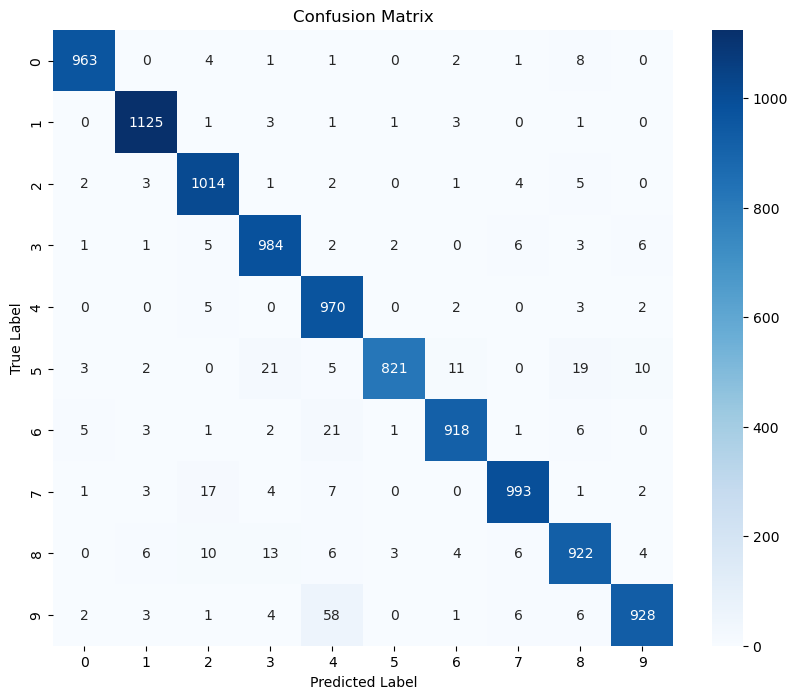

In [6]:
#add your code here

from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Build the neural network
model = Sequential()
model.add(Input(shape=(x_train_flat.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train_flat, y_train_onehot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, keras.utils.to_categorical(y_test))
print('Test accuracy:', test_accuracy)

# Make predictions on the test set
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()